In [1]:
import time

import numpy as np
import pylab as pl

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import euclidean_distances

import math
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score

from scipy.spatial import ConvexHull,convex_hull_plot_2d

In [2]:
#local path where the data locates, change it to your local path
record= pd.read_csv("Desktop/Carnivore_Research/CS_21Jan27.csv")

In [3]:
col=['Time_Seen','Species','Latitude','Longitude','Media']

In [4]:
record.columns = col
record['Time_Seen'] = pd.to_datetime(record.Time_Seen,utc=True).copy()
record['Month'] = record.Time_Seen.dt.month
record['Hour'] = record.Time_Seen.dt.hour
record['Year'] = record.Time_Seen.dt.year

In [5]:
#king county boundaries
maxLat = 47.7763
minLat = 47.1878
maxLon = -121.0941
minLon = -122.5346

In [6]:
rec19 = record[record.Year == 2019]
rec19.head()

,Time_Seen,Species,Latitude,Longitude,Media,Month,Hour,Year
0,2019-09-18 14:00:00.532000+00:00,Coyote,47.815188,-122.088653,[],9,14,2019
1,2019-08-06 13:15:00+00:00,Coyote,47.683153,-122.127485,[],8,13,2019
2,2019-09-09 13:30:00+00:00,Cougar/Mountain Lion,47.603330,-122.210544,[],9,13,2019
3,2019-08-01 16:45:00+00:00,Coyote,47.676127,-122.328966,[],8,16,2019
4,2019-12-18 22:00:00+00:00,Coyote,47.647155,-122.078566,[],12,22,2019


In [7]:
rec19_coyo = rec19[rec19.Species == 'Coyote']

In [8]:
rec19_coyo = rec19_coyo.drop(['Time_Seen','Species','Month','Hour','Year','Media'],axis=1)

In [9]:
rec19_king = rec19_coyo[(rec19_coyo['Latitude']>minLat)&(rec19_coyo['Latitude']<maxLat)&(rec19_coyo['Longitude']>minLon)&(rec19_coyo['Longitude']<maxLon)]

In [10]:
#used for plotting the polygons to the graph
greenLakeCoord = ([47.671747,-122.342462],[47.675943,-122.346329],[47.681261,-122.343798],
                                   [47.685198,-122.337713],[47.681924,-122.3289354],[47.679475,-122.329283],
                                   [47.672332,-122.338008],[47.671747,-122.342462])

In [11]:
I5Part1X = ([47.69243], [47.653678])
I5Part1Y = ([-122.3293304],[-122.322867])

In [12]:
x_c = []
y_c = []
for i in greenLakeCoord:
    x = i[0]
    y = i[1]
    x_c.append(x)
    y_c.append(y)


In [13]:
coyo19_kmeans5 = KMeans(n_clusters=5)
coyo19_kmeans5.fit(rec19_king)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

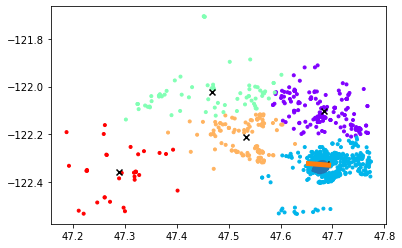

In [14]:
plt.xlim()
plt.plot(x_c,y_c, linewidth = 10)
plt.plot(I5Part1X, I5Part1Y,linewidth = 5)
plt.scatter(rec19_king.iloc[:,0], rec19_king.iloc[:,1], c=coyo19_kmeans5.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans5.cluster_centers_[:,0] ,coyo19_kmeans5.cluster_centers_[:,1], color='black',marker="x")

In [15]:
coyo19_kmeans3 = KMeans(n_clusters=3)
coyo19_kmeans3.fit(rec19_king)
clus3 = rec19_king.copy()
clus3 = pd.DataFrame(clus3)
clus3['labels'] = coyo19_kmeans3.labels_

In [16]:
#clus3.to_csv('coyo19KmeansC3_lat_long.csv')

In [17]:
coyo19_kmeans5 = KMeans(n_clusters=5)
coyo19_kmeans5.fit(rec19_king)
clus5 = rec19_king.copy()
clus5 = pd.DataFrame(clus5)
clus5['labels'] = coyo19_kmeans5.labels_

In [18]:
#clus5.to_csv('coyo19KmeansC5_lat_long.csv')

In [19]:
coyo19_kmeans12 = KMeans(n_clusters=12)
coyo19_kmeans12.fit(rec19_king)
clus12 = rec19_king.copy()
clus12 = pd.DataFrame(clus12)
clus12['labels'] = coyo19_kmeans12.labels_

In [20]:
clus12.to_csv('coyo19KmeansC12_lat_long.csv')